In [1]:
import os

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

Run the following cells to import modules and download the data set, or download the dataset [here](http://www.stat.columbia.edu/~gelman/arm/examples/speed.dating/(.

In [2]:
if not os.path.exists('data'):
    os.makedirs('data')

In [3]:
!wget -nc -O data/dating-data.csv http://www.stat.columbia.edu/~gelman/arm/examples/speed.dating/Speed%20Dating%20Data.csv

dyld: Library not loaded: /usr/local/opt/openssl/lib/libssl.1.0.0.dylib
  Referenced from: /usr/local/bin/wget
  Reason: image not found


# Data Science: Dating Dataset Analysis

Dating has undergone major overhauls in the past decades, first with the introduction of online dating and again with the rise of dating apps. Apps such as Tinder, Bumble, Hinge, OKCupid, and more all have the same goal: to facilitate successful romantic connections. Success is a difficult metric to define in such a nebulous scenario, and some artificial metric must be imposed. For example, OKCupid has performed data analyses with success defined as a certain number of messages being exchanged back and forth between users.

A common method of "matching" with a potential date on these apps. In this scenario users swipe left to reject another user and right to accept. From here, people are able to message and interact. For heterosexual couples, apps like Bumble require the woman to first accept a message request from any male suitor. On Hinge, you don't swipe right, but rather send a "like" on some aspect of a potential date's profile.

Despite variation across different apps, these swipe-based dating platforms all share the same flow:
1. Users quickly evaluate each other.
1. Users make a fast decision on whether or not to open up discussion with each other.
1. Users proceed to talk and possibly go on an in-person date.

An old-school form of meeting people, the Speed Dating event, follows this same general format. Instead of performing evaluation based on a user-setup profile, users reach their decision in a short several-minute timespan talking with multiple potential matches. At the end of the event, matches can choose to exchange information (swiping left) or not (swiping right). In these cases, success can be defined as a follow-up date between two interested parties. 

## The Proposed Challenge

### Motivation

Plenty of research has been done on studying online interactions between users to try and optimize successful romantic connections. However, in the post-coronavirus world, different forms of communicating have taken hold. It is now common for folks to have virtual happy hours, virtual watch parties, and even video dates. 

How can dating be revolutionized for a post-coronavirus society? I suggest we look back to the old school and ask what lessons we can learn from the speed dating event. When is a speed dating even successful, and what kind of personalities perform best at these events? How can these lessons be applied to swipe-based dating? Would a new service, such as virtual speed-dating, be a potential method for deeper emotional connections between users and successful matches?

### The Dataset

Colombia University professors Ray Fisman adn Sheena Iyengar [ran a series of speed dating experiments](http://www.stat.columbia.edu/~gelman/arm/examples/speed.dating/) on Columbia graduate students from 2002 to 2004, and have made this data public. They collected details before, during, and after the event, and followed up with participants to evaluate longer-term success rates. All matches were between men and women (no same-sex matches). 

Twenty-one different speed dating events were held with a total of 552 different individuals attending. Before each event, demographic information such as the subject's field of study, undegraduate alma mater, SAT score, zip code of childhood home, where the subject is from, median household income, race, and gender were collected. A series of preferential questions were also asked:
1. How important is it to you (on a scale of 1-10) that a person you date be of the same racial/ethnic background?
1. How important is it to you (on a scale of 1-10) that a person you date be of the same religious background?

Next, questions regarding the expectations of the participants were asked. The details of these questions can be seen in the data key. 

### The Analysis

Participants were given surveys on the attributes of the types of people they think they would be romantically interested in. They were also given surveys on their attitude about how likely they were to meet someone and general outlook on the event. These questionaires were given before the event, halfway through the event, and after the event.

Do participants' attitudes change thorughout the event? How does the initial attitude of a participant effect their ability to go on dates, and how does that compare to their final attitude? Can this initial attitude predict match success? 

## Data Exploration

First let's do some exploratory analysis of the data. The first step is to load it up into a Pandas dataframe. 

In [11]:
def load_data():
    df = pd.read_csv("data/dating-data.csv", encoding='latin1')
    # Remove columns with no information.
    drop_cols = [col for col in df.columns if df[col].value_counts().shape[0] <= 1]
    df = df[df.columns.difference(drop_cols)]
    return df

df = load_data()
df.head()

,age,age_o,amb,amb1_1,amb1_2,amb1_3,amb1_s,amb2_1,amb2_2,amb2_3,...,theater,them_cal,tuition,tv,tvsports,undergra,wave,yoga,you_call,zipcode
0,21.0,27.0,6.0,15.0,11.11,15.0,NaN,5.0,NaN,NaN,...,1.0,1.0,NaN,9.0,2.0,NaN,1,1.0,1.0,"60,521"
1,21.0,22.0,5.0,15.0,11.11,15.0,NaN,5.0,NaN,NaN,...,1.0,1.0,NaN,9.0,2.0,NaN,1,1.0,1.0,"60,521"
2,21.0,22.0,5.0,15.0,11.11,15.0,NaN,5.0,NaN,NaN,...,1.0,1.0,NaN,9.0,2.0,NaN,1,1.0,1.0,"60,521"
3,21.0,23.0,6.0,15.0,11.11,15.0,NaN,5.0,NaN,NaN,...,1.0,1.0,NaN,9.0,2.0,NaN,1,1.0,1.0,"60,521"
4,21.0,24.0,6.0,15.0,11.11,15.0,NaN,5.0,NaN,NaN,...,1.0,1.0,NaN,9.0,2.0,NaN,1,1.0,1.0,"60,521"


There are multiple potential target variables in this data set. A good short-term target is whether or not two participants matched during the event, meaning they chose each other and were eligible to receive each others' contact information. However, I am interested in something deeper: Not just whether participants matched, but whether they *contacted each other*.

So I would like to look at the long-term outcomes. Long-term target variables in this data set, or the outcomes, were collected 3-4 weeks after subjects had been sent their matches. These variables are:
* `you_call`: How many matches has the subject contacted to set up a date?
* `them_cal`: How many have contacted the subject?
* `date_3`: Have you been on a date with any matches? (Yes = 1, no = 2)
* `numdat_3`: How many matches have you been on a date with so far?

We have 195 total columns in the table. Looking at the data key, we see that data includes information such as:
 * `iid`: Unique identifier for each separate subject.
 * `id`: Subject number within a speed dating event, or "wave".
 * `idg`: Subject number within their gender group. 

### Demographics

First let's look at some demographic information. 

Text(0.5, 1.0, 'Count of particpants by gender')

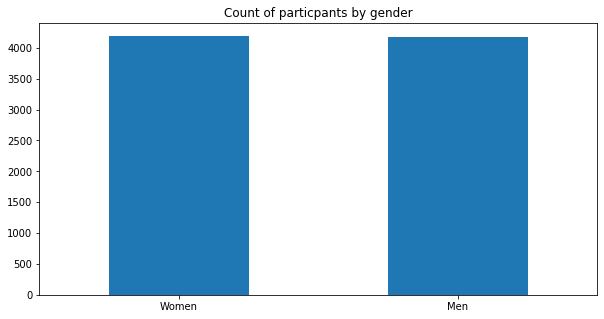

In [12]:
ax = df.gender.value_counts().plot.bar()
ax.set_xticklabels(["Women", "Men"], rotation=0)
plt.title("Count of particpants by gender")

The number of men and women participating is similar, as expected. 


### Questionaire Answers

Let's look at subjects' answers to some of the initial questions they were asked.

In [13]:
def agg_plot(question, attribute, groupby, answer_key, legend_vals):
    pltdat = df.groupby([groupby]).agg(dat_count=(attribute,'value_counts'))
    pltdat = pltdat.reset_index()

    ax = sns.barplot(x=attribute, y='dat_count', hue=groupby, data=pltdat)
    plt.title(question)
    ax.set_xlabel(attribute)
    ax.set_ylabel('Number Of Occurences')
    ax.set_xticklabels(answer_key, rotation=90)
    
    for a,b in zip(ax.axes.get_legend().texts, legend_vals): a.set_text(b)
        
        

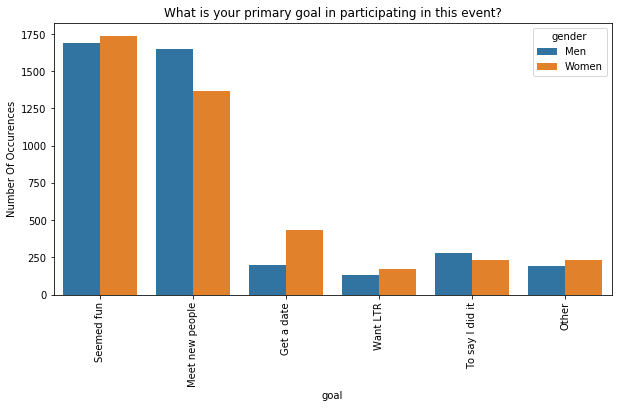

In [14]:
question="What is your primary goal in participating in this event?"
answers=['Seemed fun', 'Meet new people', 'Get a date', 'Want LTR', 'To say I did it','Other']
new_legend=['Men','Women']
agg_plot(question, 'goal', "gender", answers, new_legend)

The vast majority of participants of both genders participated because it seemed like it would be fun or because they wanted to meet new people. Relatively few participated with the express purpose of finding a date, and even fewer with the goal of finding a long-term relationship.

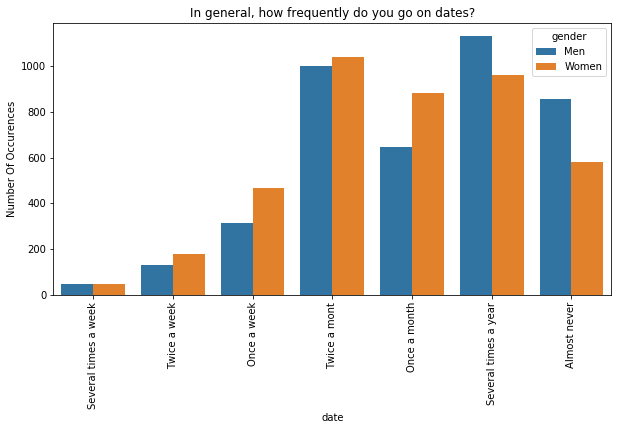

In [15]:
question = "In general, how frequently do you go on dates?"
answers = ['Several times a week', 'Twice a week', 'Once a week', 'Twice a mont', 'Once a month', 'Several times a year', 'Almost never']
agg_plot(question, 'date', 'gender', answers, new_legend)

There's a few superstar daters, going on dates multiple times a week. Most participants claim to go on dates twice a month or less.

Alright, let's move on.


### Outcomes

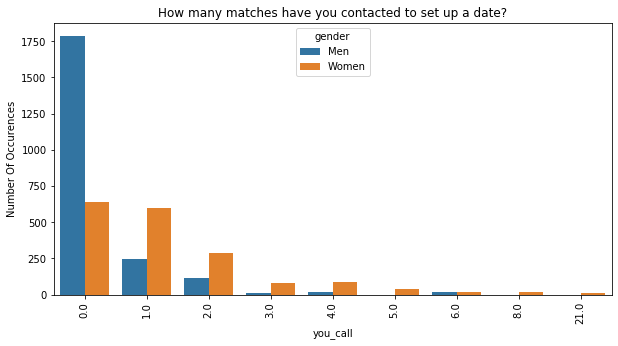

In [16]:
question = "How many matches have you contacted to set up a date?"
answers = df.you_call.unique()
answers.sort()
agg_plot(question, 'you_call', "gender", answers, new_legend)

First thing we notice is that men were far less likely to contact dates.


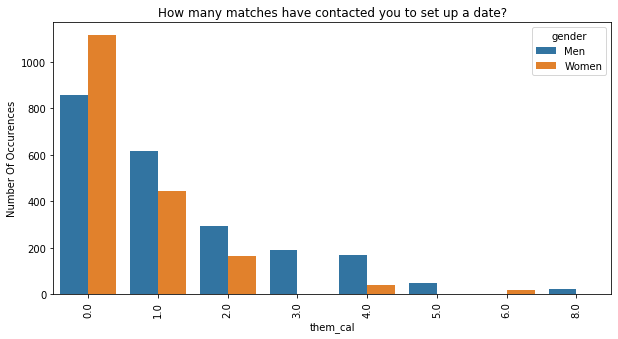

In [17]:
question = "How many matches have contacted you to set up a date?"
answers = df.you_call.unique()
answers.sort()
agg_plot(question, 'them_cal', "gender", answers, new_legend)

It appears that participants do not often contact one another. 

Ultimately, the goal of this project is: Under what conditions do participants contact each other?
